In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
RANDOM_STATE = 341
torch.manual_seed(RANDOM_STATE)



In [2]:
def PlotStuff(X,Y,model=None,leg=False):
    
    # plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    # plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),Y.numpy(),label='data ')
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neral network ')

    plt.legend()
    plt.show()

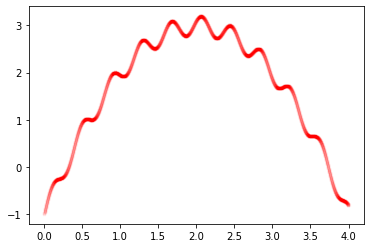

In [3]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.linspace(0, 4, 10000).view(-1,1)
        self.y=-(self.x-2)**2 + 3 + 0.2*np.sin(16*self.x)
        self.len=self.x.shape[0]
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

data_set=Data()
plt.figure()
plt.plot(data_set.x,data_set.y,'.r',alpha=0.01)

In [4]:
# Define the class Net

class Net(nn.Module):
    
    # Constructor
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,H)
        self.linear3=nn.Linear(H,D_out)
    
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=torch.sigmoid(self.linear2(x))  
        x=self.linear3(x)
        return x

In [5]:
def train(data_set,model,criterion, train_loader, optimizer, epochs=5,plot_number=10):
    cost=[]
    
    for epoch in range(epochs):
        total=0
        
        for x,y in train_loader:
            
            # batch_size = 100
            # x=(100, 1), y=(100,1)

            optimizer.zero_grad()
            
            yhat=model(x)
            loss=criterion(yhat,y)
            loss.backward()
            optimizer.step()
            total+=loss.item()
            
        if epoch%plot_number==0:
            PlotStuff(data_set.x,data_set.y,model)
         
        
        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

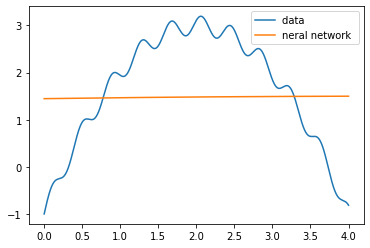

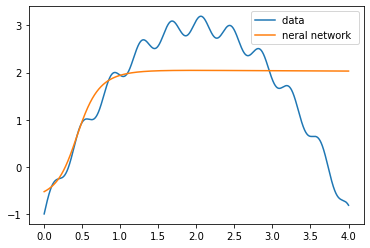

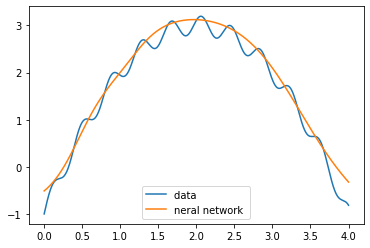

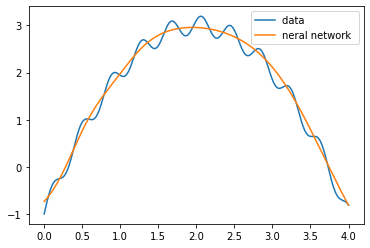

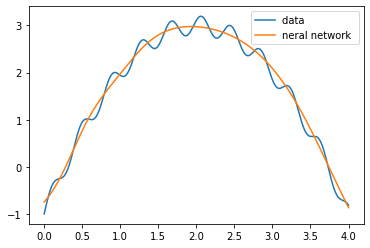

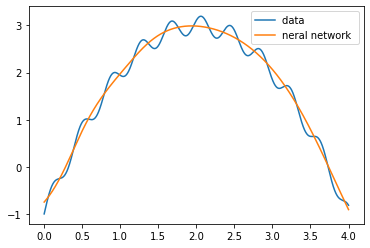

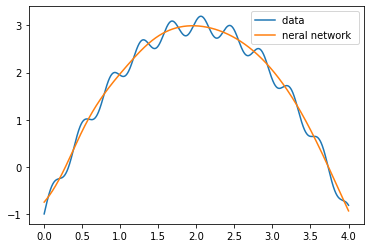

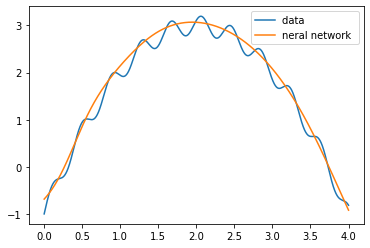

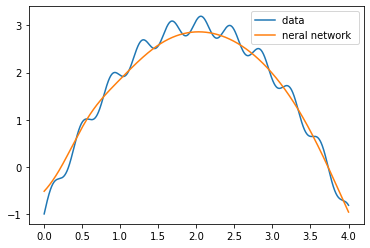

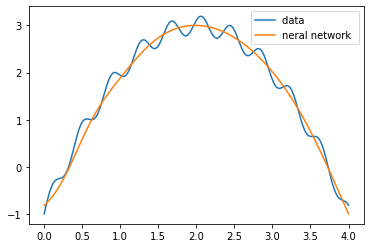

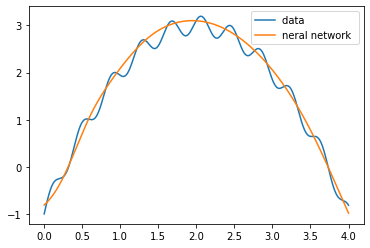

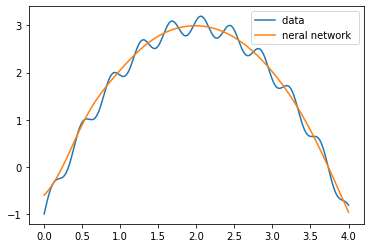

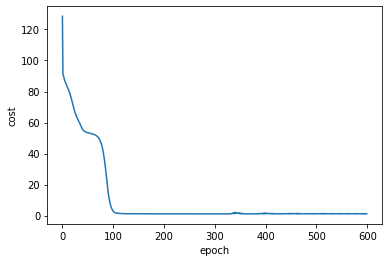

In [6]:
torch.manual_seed(0)
model=Net(1,10,1)
learning_rate=0.005
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)


train_loader=DataLoader(dataset=data_set,batch_size=200)


COST=train(data_set,model,criterion, train_loader, optimizer, epochs=600,plot_number=50)